FULL DATASET OVERVIEW
Full dataset shape: (630000, 15)

✓ Sampled 5000 rows from full dataset
  (Requirement: minimum 500 rows - ✓ Met!)

SAMPLED DATASET OVERVIEW
Dataset shape: (5000, 15)
Number of rows: 5000
Number of columns: 15

FIRST 5 ROWS
       id  Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  \
0  476720   46    1                3  134          223             0   
1  592304   59    1                4  130          315             0   
2  558873   54    1                4  106          303             0   
3  446884   51    1                3  130          234             0   
4  263856   44    1                3  110          212             0   

   EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
0            2     179                1            1.5            2   
1            0     140                1            0.0            1   
2            0     151                0            2.0            2   
3            0     162               

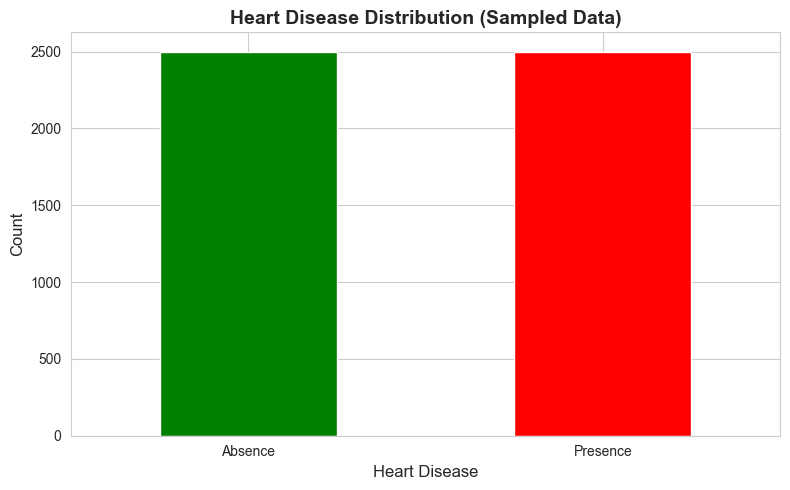

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

df_full = pd.read_csv('hear_disease_dataset/heart_disease.csv')

print("="*60)
print("FULL DATASET OVERVIEW")
print("="*60)
print(f"Full dataset shape: {df_full.shape}")

df = df_full.groupby('Heart Disease', group_keys=False).apply(
    lambda x: x.sample(min(len(x), 2500), random_state=42)
).sample(frac=1, random_state=42).reset_index(drop=True)

if len(df) > 5000:
    df = df.head(5000)

print(f"\n✓ Sampled {len(df)} rows from full dataset")
print(f"  (Requirement: minimum 500 rows - ✓ Met!)")

print("\n" + "="*60)
print("SAMPLED DATASET OVERVIEW")
print("="*60)
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\n" + "="*60)
print("FIRST 5 ROWS")
print("="*60)
print(df.head())

print("\n" + "="*60)
print("COLUMN NAMES AND DATA TYPES")
print("="*60)
print(df.dtypes)

print("\n" + "="*60)
print("MISSING VALUES")
print("="*60)
print(df.isnull().sum())

print("\n" + "="*60)
print("BASIC STATISTICS")
print("="*60)
print(df.describe())

print("\n" + "="*60)
print("TARGET VARIABLE DISTRIBUTION")
print("="*60)
print(df['Heart Disease'].value_counts())
print("\nPercentage distribution:")
print(df['Heart Disease'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
df['Heart Disease'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Heart Disease Distribution (Sampled Data)', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [2]:
df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,476720,46,1,3,134,223,0,2,179,1,1.5,2,0,3,Absence
1,592304,59,1,4,130,315,0,0,140,1,0.0,1,1,7,Presence
2,558873,54,1,4,106,303,0,0,151,0,2.0,2,2,6,Presence
3,446884,51,1,3,130,234,0,0,162,0,0.0,1,0,7,Absence
4,263856,44,1,3,110,212,0,2,116,0,0.0,1,0,3,Absence



STEP 2: DATA PREPROCESSING

✓ Dropped 'id' column

✓ Encoded target variable:
  - Absence = 0
  - Presence = 1

✓ Features shape: (5000, 13)
✓ Target shape: (5000,)

Feature columns:
  1. Age
  2. Sex
  3. Chest pain type
  4. BP
  5. Cholesterol
  6. FBS over 120
  7. EKG results
  8. Max HR
  9. Exercise angina
  10. ST depression
  11. Slope of ST
  12. Number of vessels fluro
  13. Thallium

CORRELATION WITH TARGET VARIABLE
Heart Disease              1.000000
Thallium                   0.576382
Chest pain type            0.461633
Exercise angina            0.441897
Number of vessels fluro    0.424204
Slope of ST                0.422626
ST depression              0.414058
Sex                        0.341059
EKG results                0.223779
Age                        0.203611
Cholesterol                0.061577
FBS over 120               0.056898
BP                        -0.006857
Max HR                    -0.458312
Name: Heart Disease, dtype: float64


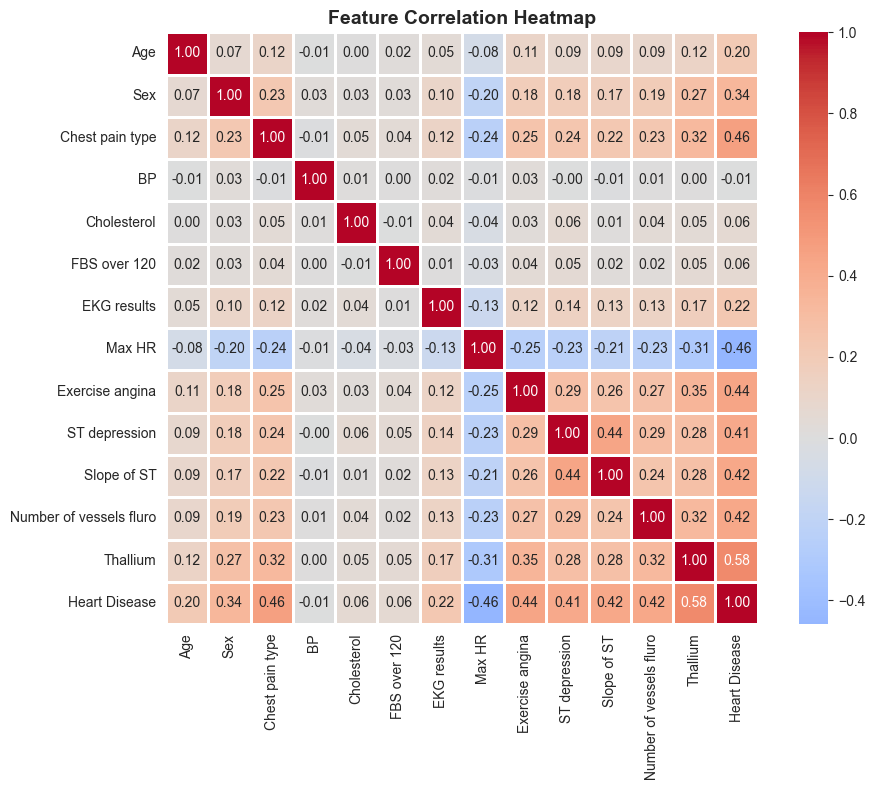


TRAIN-TEST SPLIT
Training set size: 4000 samples (80.0%)
Testing set size: 1000 samples (20.0%)

Training set target distribution:
Heart Disease
1    2000
0    2000
Name: count, dtype: int64

Testing set target distribution:
Heart Disease
0    500
1    500
Name: count, dtype: int64

✓ Data preprocessing complete!


In [ ]:
print("\n" + "="*60)
print("STEP 2: DATA PREPROCESSING")
print("="*60)

data = df.copy()

if 'id' in data.columns:
    data = data.drop('id', axis=1)
    print("\n✓ Dropped 'id' column")

label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

print("\n✓ Encoded target variable:")
print(f"  - Absence = 0")
print(f"  - Presence = 1")

X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

print(f"\n✓ Features shape: {X.shape}")
print(f"✓ Target shape: {y.shape}")

print("\nFeature columns:")
for i, col in enumerate(X.columns, 1):
    print(f"  {i}. {col}")

print("\n" + "="*60)
print("CORRELATION WITH TARGET VARIABLE")
print("="*60)
correlation = data.corr()['Heart Disease'].sort_values(ascending=False)
print(correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n" + "="*60)
print("TRAIN-TEST SPLIT")
print("="*60)
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(data)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(data)*100:.1f}%)")

print("\nTraining set target distribution:")
print(pd.Series(y_train).value_counts())

print("\nTesting set target distribution:")
print(pd.Series(y_test).value_counts())

print("\n✓ Data preprocessing complete!")
print("="*60)


STEP 3: TRAINING ALL 6 MODELS

Training: Logistic Regression
✓ Training completed in 0.16 seconds

Metrics:
  • Accuracy:  0.8840
  • AUC Score: 0.9532
  • Precision: 0.8825
  • Recall:    0.8860
  • F1 Score:  0.8842
  • MCC Score: 0.7680

Training: Decision Tree
✓ Training completed in 0.01 seconds

Metrics:
  • Accuracy:  0.8100
  • AUC Score: 0.8100
  • Precision: 0.8163
  • Recall:    0.8000
  • F1 Score:  0.8081
  • MCC Score: 0.6201

Training: KNN
✓ Training completed in 0.02 seconds

Metrics:
  • Accuracy:  0.7210
  • AUC Score: 0.7863
  • Precision: 0.7297
  • Recall:    0.7020
  • F1 Score:  0.7156
  • MCC Score: 0.4423

Training: Naive Bayes
✓ Training completed in 0.01 seconds

Metrics:
  • Accuracy:  0.8680
  • AUC Score: 0.9389
  • Precision: 0.8710
  • Recall:    0.8640
  • F1 Score:  0.8675
  • MCC Score: 0.7360

Training: Random Forest
✓ Training completed in 0.24 seconds

Metrics:
  • Accuracy:  0.8720
  • AUC Score: 0.9500
  • Precision: 0.8735
  • Recall:    0.8700

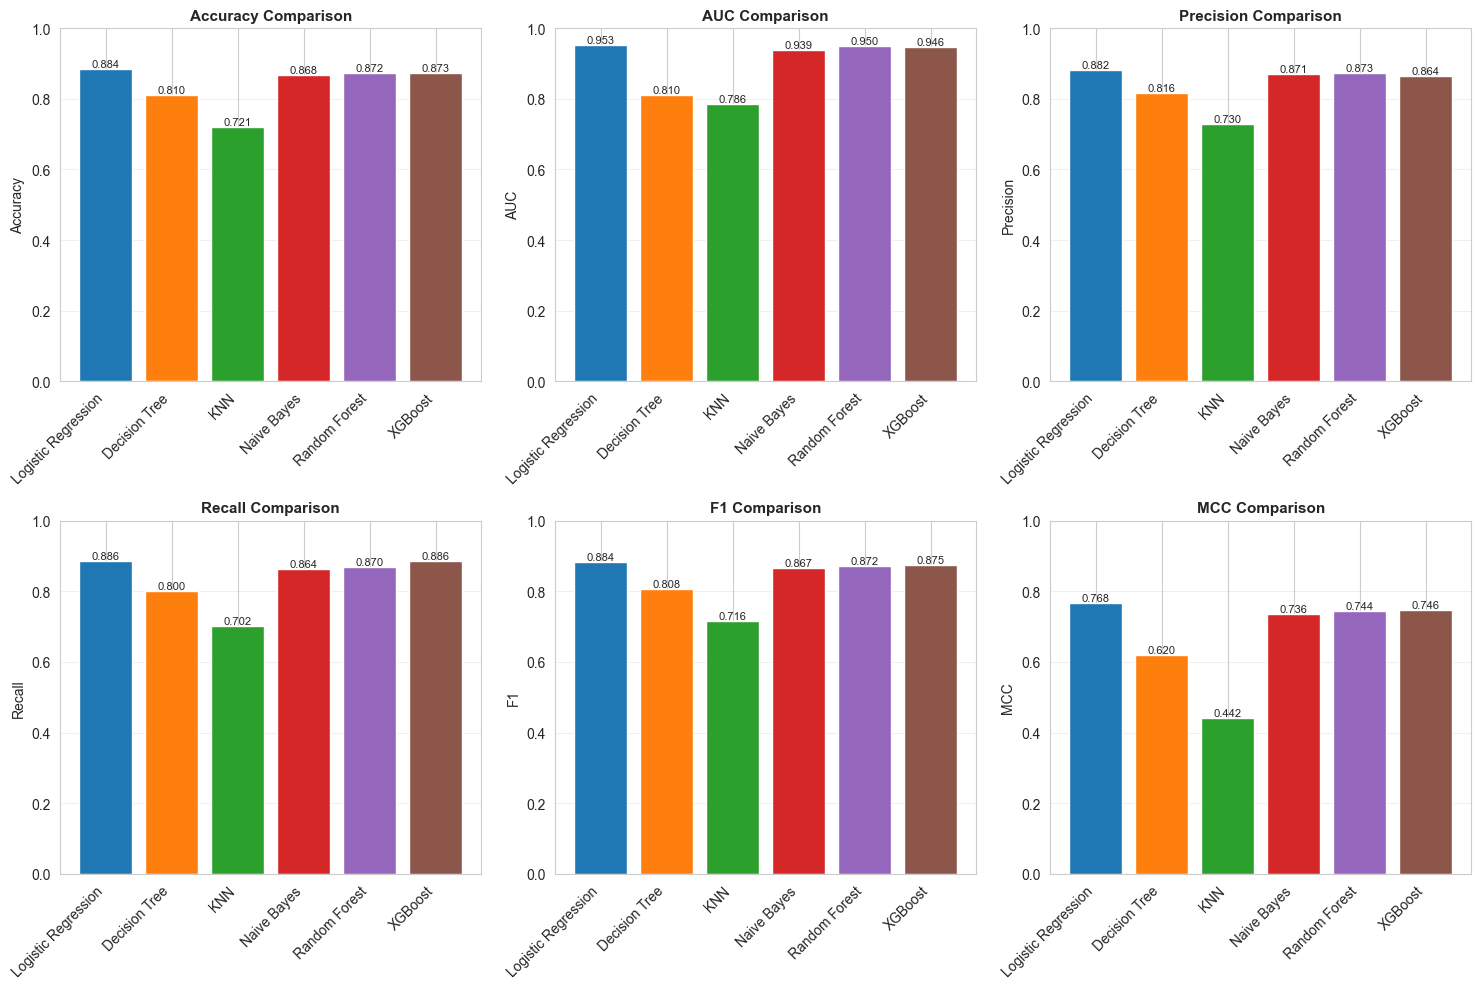


✓ Step 3 Complete!


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, 
                             recall_score, f1_score, matthews_corrcoef,
                             confusion_matrix, classification_report)
import time

print("\n" + "="*60)
print("STEP 3: TRAINING ALL 6 MODELS")
print("="*60)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

results = []

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training: {name}")
    print(f"{'='*60}")
    
    start_time = time.time()
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    training_time = time.time() - start_time
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'AUC': auc,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'MCC': mcc,
        'Training Time (s)': training_time
    })
    
    print(f"✓ Training completed in {training_time:.2f} seconds")
    print(f"\nMetrics:")
    print(f"  • Accuracy:  {accuracy:.4f}")
    print(f"  • AUC Score: {auc:.4f}")
    print(f"  • Precision: {precision:.4f}")
    print(f"  • Recall:    {recall:.4f}")
    print(f"  • F1 Score:  {f1:.4f}")
    print(f"  • MCC Score: {mcc:.4f}")

results_df = pd.DataFrame(results)

print("\n" + "="*60)
print("ALL MODELS TRAINED SUCCESSFULLY!")
print("="*60)

print("\n" + "="*60)
print("MODEL COMPARISON TABLE")
print("="*60)
print(results_df.to_string(index=False))

print("\n" + "="*60)
print("BEST MODELS PER METRIC")
print("="*60)
for metric in ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']:
    best_model = results_df.loc[results_df[metric].idxmax(), 'Model']
    best_score = results_df[metric].max()
    print(f"  • {metric:12s}: {best_model:20s} ({best_score:.4f})")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
metrics_to_plot = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']

for idx, metric in enumerate(metrics_to_plot):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    bars = ax.bar(range(len(results_df)), results_df[metric], color=colors)
    ax.set_xticks(range(len(results_df)))
    ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
    ax.set_ylabel(metric, fontsize=10)
    ax.set_title(f'{metric} Comparison', fontsize=11, fontweight='bold')
    ax.set_ylim([0, 1.0])
    ax.grid(axis='y', alpha=0.3)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("\n✓ Step 3 Complete!")


STEP 4: SAVING MODELS & GENERATING DETAILED ANALYSIS

SAVING TRAINED MODELS
✓ Saved: model/logistic_regression_model.pkl
✓ Saved: model/decision_tree_model.pkl
✓ Saved: model/knn_model.pkl
✓ Saved: model/naive_bayes_model.pkl
✓ Saved: model/random_forest_model.pkl
✓ Saved: model/xgboost_model.pkl

✓ All models saved successfully!

CONFUSION MATRICES


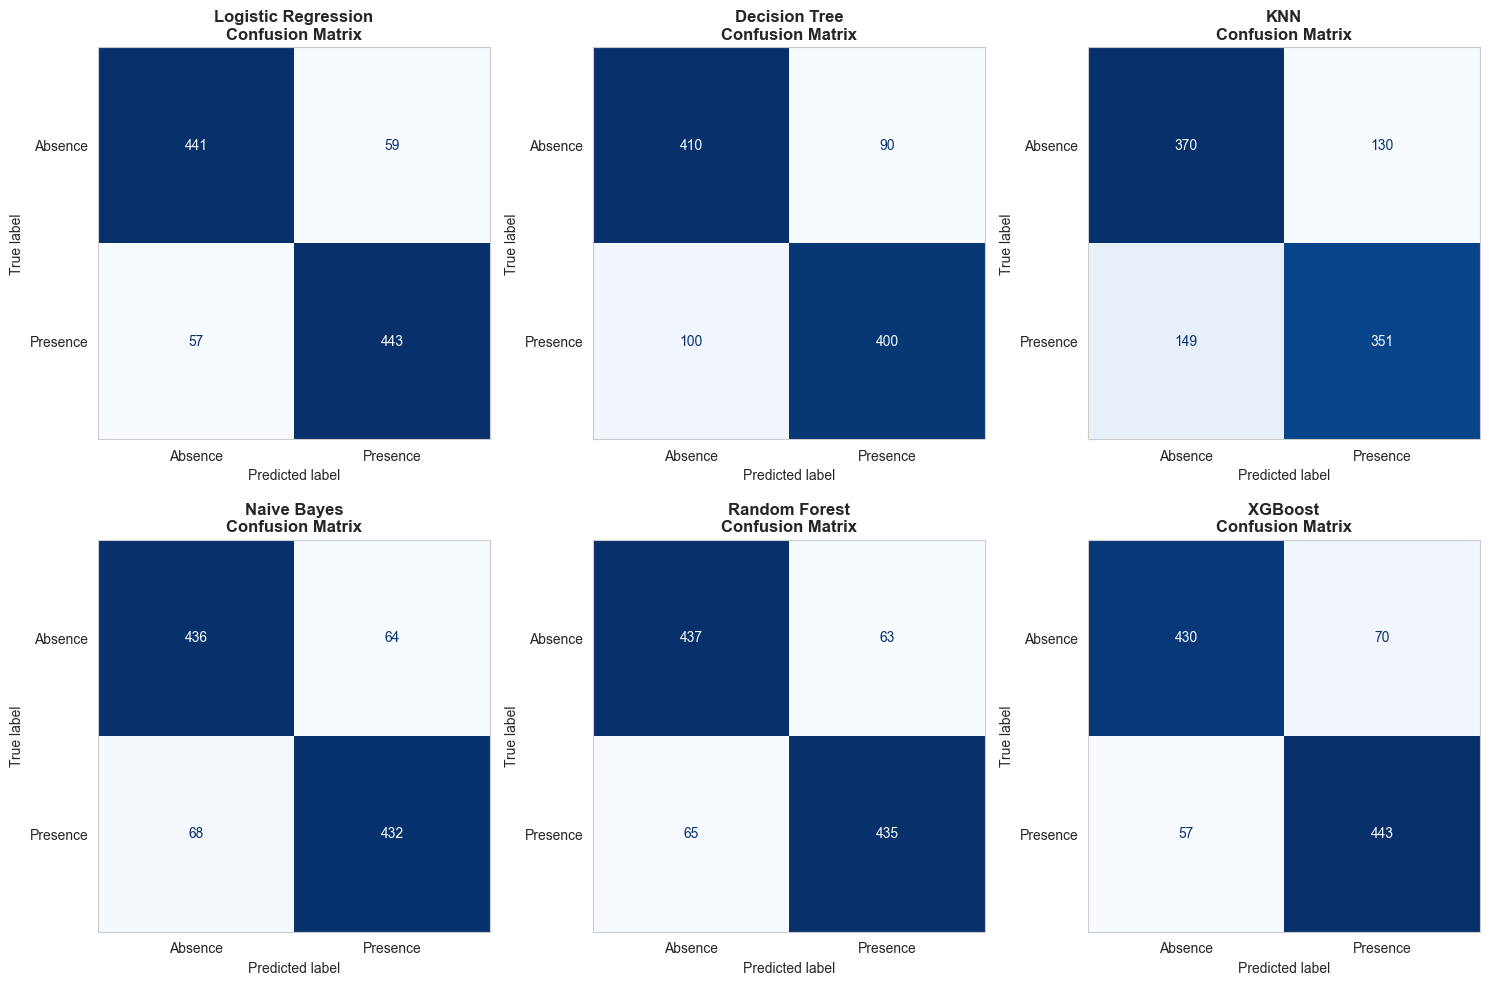


CLASSIFICATION REPORTS

Logistic Regression
              precision    recall  f1-score   support

     Absence     0.8855    0.8820    0.8838       500
    Presence     0.8825    0.8860    0.8842       500

    accuracy                         0.8840      1000
   macro avg     0.8840    0.8840    0.8840      1000
weighted avg     0.8840    0.8840    0.8840      1000


Decision Tree
              precision    recall  f1-score   support

     Absence     0.8039    0.8200    0.8119       500
    Presence     0.8163    0.8000    0.8081       500

    accuracy                         0.8100      1000
   macro avg     0.8101    0.8100    0.8100      1000
weighted avg     0.8101    0.8100    0.8100      1000


KNN
              precision    recall  f1-score   support

     Absence     0.7129    0.7400    0.7262       500
    Presence     0.7297    0.7020    0.7156       500

    accuracy                         0.7210      1000
   macro avg     0.7213    0.7210    0.7209      1000
weighted 

In [ ]:
import pickle
import os
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

print("\n" + "="*60)
print("STEP 4: SAVING MODELS & GENERATING DETAILED ANALYSIS")
print("="*60)

os.makedirs('model', exist_ok=True)

print("\n" + "="*60)
print("SAVING TRAINED MODELS")
print("="*60)

for name, model in models.items():
    filename = f"model/{name.replace(' ', '_').lower()}_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"✓ Saved: {filename}")

print("\n✓ All models saved successfully!")

print("\n" + "="*60)
print("CONFUSION MATRICES")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                   display_labels=['Absence', 'Presence'])
    disp.plot(ax=axes[idx], cmap='Blues', colorbar=False)
    axes[idx].set_title(f'{name}\nConfusion Matrix', fontweight='bold')
    axes[idx].grid(False)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("CLASSIFICATION REPORTS")
print("="*60)

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{'='*60}")
    print(f"{name}")
    print(f"{'='*60}")
    print(classification_report(y_test, y_pred, 
                                target_names=['Absence', 'Presence'],
                                digits=4))

results_df.to_csv('model/model_comparison_results.csv', index=False)
print("\n✓ Saved: model/model_comparison_results.csv")

test_data = pd.DataFrame(X_test, columns=X.columns)
test_data['Heart Disease'] = y_test.values
test_data_sample = test_data.sample(min(100, len(test_data)), random_state=42)
test_data_sample.to_csv('model/test_data_sample.csv', index=False)
print("✓ Saved: model/test_data_sample.csv (for Streamlit app)")

print("\n" + "="*60)
print("STEP 4 COMPLETE!")
print("="*60)
print("\nFiles created:")
print("  • 6 model pickle files (.pkl)")
print("  • model_comparison_results.csv")
print("  • test_data_sample.csv")
print("\nYou now have everything needed for:")
print("  1. Streamlit app deployment")
print("  2. README documentation")
print("  3. Model inference")